## Analysis Ride Sharing Data

###  Analysis relationship between the following variables:
* Average Fare per City
* Total Number of Rides per City
* Total Number of Driver per City

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [19]:
%matplotlib notebook
%matplotlib inline

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Extract data from csv files

In [21]:
# Read the city data
city_file = "data/city_data.csv"
cities_df = pd.read_csv(city_file)
cities_df.sort_values(['city'], inplace=True)
cities_df.reset_index(drop=True, inplace=True)
cities_df.head()

,city,driver_count,type
0,Amandaburgh,12,Urban
1,Barajasview,26,Urban
2,Barronchester,11,Suburban
3,Bethanyland,22,Suburban
4,Bradshawfurt,7,Rural


In [22]:
# Read the Ride and Data
ride_file = "data/ride_data.csv"
rides_df = pd.read_csv(ride_file)
rides_df.sort_values(['city'], inplace=True)
rides_df.reset_index(drop=True, inplace=True)
rides_df.head()

,city,date,fare,ride_id
0,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007
1,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437
3,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986
4,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176


In [23]:
# Verify the cities in the rides_df and cities_df are consistant
list(cities_df.loc[:, "city"]) == list(rides_df["city"].unique())

True

### Cleaning data

In [24]:
# Combine the data into a single dataset
cities_rides_df = pd.merge(rides_df, cities_df, on="city")
cities_rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007,12,Urban
1,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
3,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
4,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176,12,Urban


In [25]:
# Get the city types
city_types = list(cities_df["type"].unique())
city_types = [city_types[2], city_types[1], city_types[0]]
city_types

['Rural', 'Suburban', 'Urban']

### Plot of Ride Sharing Data:

In [26]:
cities_rides_grouped = cities_rides_df.groupby(['type', 'city'])

In [36]:
# Find min and max ride counts, use as x limit
cities_rides_grouped = cities_rides_df.groupby(['type', 'city'])
number_of_rides = cities_rides_grouped['city'].count()
x_min = int(np.floor(number_of_rides.min())) - 3
x_max = int(np.ceil(number_of_rides.max())) + 2
x_min, x_max

(0, 41)

In [37]:
# Find min and max average fares, use as y limit
average_fares = cities_rides_grouped['fare'].mean()
y_min = int(np.floor(average_fares.min())) - 1
y_max = int(np.ceil(average_fares.max())) + 1
y_min, y_max

(19, 45)

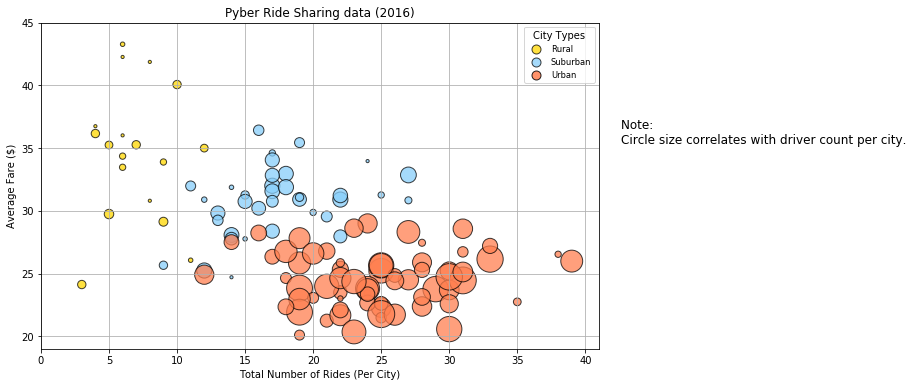

In [38]:
# Set x limit, y limit
plt.figure(figsize=(10,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Set title, xlabel, y label, and grid
plt.title("Pyber Ride Sharing data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Plot the scatter plot
for city_type in city_types:
    if city_type == "Rural":
        color = "Gold"
    elif city_type == 'Suburban':
        color = 'lightskyblue'
    else:
        color = 'coral'
    
    rides_grouped_by_city = cities_rides_df.loc[cities_rides_df['type'] == city_type].groupby('city')
    
    number_of_rides_by_city = rides_grouped_by_city['fare'].count()
    average_fare_by_city = rides_grouped_by_city["fare"].mean()
    drivers_count_by_city = (rides_grouped_by_city['driver_count'].mean()) * 10
    
    # Plot the chart
    plt.scatter(number_of_rides_by_city, 
                average_fare_by_city, 
                marker="o", 
                facecolors=color, 
                edgecolors="black",
                s=drivers_count_by_city, 
                alpha=0.75, 
                label=type)

# Create dummy objects for legend
h1 = plt.scatter([0], [0], marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label="Rural")
h2 = plt.scatter([0], [0], marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75, label="Suburban")
h3 = plt.scatter([0], [0], marker="o", facecolors="coral", edgecolors="black", alpha=0.85, label="Urban")

# Set legend
legend = plt.legend(handles=[h1, h2, h3], 
                    markerscale=1.5, 
                    title="City Types", 
                    loc="best", 
                    fontsize='small', 
                    fancybox=True)

# Incorporate a text label regarding circle size
plt.figtext(0.93, 
            0.60,
            "Note: \nCircle size correlates with driver count per city.", 
            wrap=False,
            horizontalalignment='left', 
            fontsize=12)

plt.savefig("analysis/pyber.png", bbox_inches='tight')
plt.show()   

#### Findings:
* Average fare is lower in urban area, higher in rural area.
* More drivers in urban cities.
* Rural cities has less drivers, that could be the reason the average fare is higher in rural area

### Pie charts that shows the relationship between the following variables

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [39]:
rides_by_city_type = cities_rides_df.groupby('type')
drivers_by_city_type = cities_df.groupby('type')

In [40]:
# Setup labels, colors, and explode for the charts
labels = city_types
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

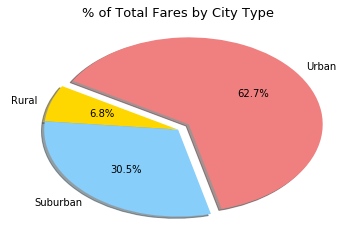

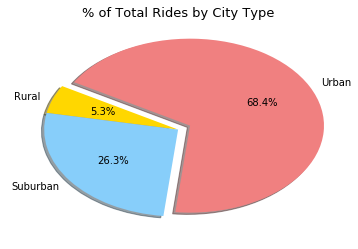

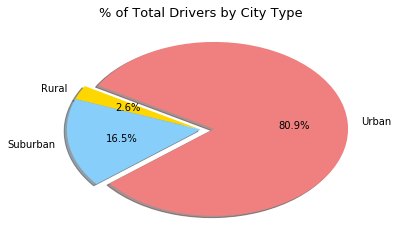

In [41]:
# Use for loop to plot the pie charts
topics = ['Fares', 'Rides', 'Drivers']

for topic in topics:
    if topic == 'Drivers':
        # Calculate total Drivers by city type
        data = drivers_by_city_type['driver_count'].sum()
    elif topic == 'Fares':
        # Calculate total fares by city type
        data = rides_by_city_type['fare'].sum()
    elif topic == 'Rides':
        # Calculate Rides per city type
        data = rides_by_city_type['ride_id'].count()
    title = "% of Total " + topic + " by City Type"
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Plot the pie chart
    ax.pie(data, 
           labels=labels, 
           colors=colors, 
           startangle=150, 
           autopct="%1.1f%%", 
           shadow=True, 
           explode=explode)
    
    # Title for the chart
    ax.text(0, 1.3, 
            title, 
            wrap=True, 
            horizontalalignment='center', 
            fontsize=13)
    
    # Save to file
    filename = "analysis/" + topic.lower() + ".png"
    plt.savefig(filename)
    plt.show()
   

#### Findings:
* Rural and suburban take almost 40% of total fare
* Rural and suburban have only 20% of total drivers, opportunity may present in 